In [2]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import balanced_accuracy_score, roc_curve, confusion_matrix, accuracy_score, auc
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler 
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
from IPython.lib.display import Audio
%matplotlib inline

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, roc_curve, auc, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [4]:
# data 
data = pd.read_csv('C:\\Users\\gianl\\Capstone2\\data\Real_fake_news_EDAed.csv')
links = ['facbooolink','bitlyylinkk','youtubelink','twitterlink', 'tmsnrtlinnk'] # this will be used during modeling
y = data['Real_Fake'] # dependent variable 

#extraction of linguistic indexes and scaling

Linguistic_index = data[['Gulpease_title', 'Flesh_Kin_Grade_title', 'ARI_title', 'smog_title', 'sent_text', 'Complex_words_text', 'CLI_text', 'sent_title', 'Gulpease_text', 'Flesh_Kin_Grade_text', 'Long_words_title', 'Count_words_title', 'Complex_words_title']]
scale= StandardScaler()
Ling_Indexes_scaled = scale.fit_transform(Linguistic_index)

# MODELING

### 1 - MultinomialNB: CountVectorizer on Lemmetized text

In [8]:
# Results from multinomial Naive Bayes, CountVectorizer, max_df = 0.65

min_df1 = [15, 25, 50, 100, 200, 300, 400, 500, 1000, 2000, 5000, 10000]
Balanced_acc_model2 = []
AUC_model2 = []
words1 = []

for i in min_df1:
    vectorizer = CountVectorizer(min_df = i, max_df=0.65, stop_words = ['reuters'])
    vectorizer.fit(data['text_nlp_lem'])
    x_v_min_df = vectorizer.transform(data['text_nlp_lem'])
    x_v_min_df = x_v_min_df.toarray()
    words1.append(x_v_min_df.shape[1])
    x_train, x_test, y_train, y_test = train_test_split(x_v_min_df , y, test_size = 0.2, random_state = 42)

    classif = MultinomialNB()
    classif.fit(x_train, y_train)
    y_pred = classif.predict(x_test)
    
    probs = classif.predict_proba(x_test)
    probs= probs[:,1]
    
    fpr, tpr, threshold = roc_curve(y_test,probs)
    AUC_model2.append(round(auc(fpr, tpr),4))

    Balanced_acc_model2.append(float('{:.4f}'.format(balanced_accuracy_score(y_test, y_pred, adjusted =True))))
    
for i,j,z in zip(min_df1, Balanced_acc_model2, AUC_model2):
    print('min_df =', i, ', Balanced accuracy =', j, ', AUC = ', z )

min_df = 15 , Balanced accuracy = 0.8757 , AUC =  0.97
min_df = 25 , Balanced accuracy = 0.8746 , AUC =  0.9696
min_df = 50 , Balanced accuracy = 0.8749 , AUC =  0.9697
min_df = 100 , Balanced accuracy = 0.8718 , AUC =  0.9693
min_df = 200 , Balanced accuracy = 0.8652 , AUC =  0.9686
min_df = 300 , Balanced accuracy = 0.8637 , AUC =  0.9684
min_df = 400 , Balanced accuracy = 0.8616 , AUC =  0.9685
min_df = 500 , Balanced accuracy = 0.8643 , AUC =  0.9687
min_df = 1000 , Balanced accuracy = 0.8578 , AUC =  0.9687
min_df = 2000 , Balanced accuracy = 0.8525 , AUC =  0.9684
min_df = 5000 , Balanced accuracy = 0.8319 , AUC =  0.9644
min_df = 10000 , Balanced accuracy = 0.7078 , AUC =  0.9179


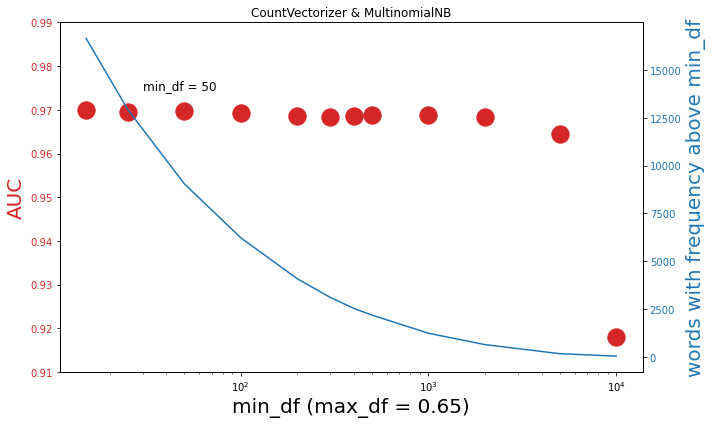

In [9]:
#plotting AUC VS min_df

fig, ax1 = plt.subplots(figsize =(10,6))
plt.title('CountVectorizer & MultinomialNB')
color = 'tab:red'
ax1.scatter(min_df1, AUC_model2, color = color, s=300)
ax1.set_ylabel('AUC', color = color, fontsize = 20)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlabel('min_df (max_df = 0.65)', fontsize = 20)
ax1.yaxis.set_ticks(np.arange(0.9100, 1.00, 0.01))
ax1.set_xscale('log')

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(min_df1, words1, color = color)
ax2.set_ylabel('words with frequency above min_df', color = color , fontsize = 20)
ax2.tick_params(axis='y', labelcolor=color)
plt.annotate('min_df = 50', xytext=(30, 14000), xy=(800, 1500), fontsize = 12)
plt.tight_layout()
plt.savefig('C:\\Users\\gianl\\Capstone2\\figures\\accuracy_CountVectorizer_MultinomialNB.tiff', dpi =120)
plt.show();

**Conclusion: With min_df = 50, AUC is slightly lower than with min_df= 15, but it is way faster.**  

In [10]:
# Ngrams with CountVectorizer (min_df = 50, max_df=0.65), check 2 values of alpha (0.01, 0.1, 1), multinomial NB

ngram =[]
best_param = []
accuracy = []
AUC_model2b = []
param_grid = {'alpha':[0.01, 0.1, 1]}

first_g = [1,1,1,2,2,3]
second_g = [1,2,3,2,3,3]

for i,j in zip(first_g, second_g):
    counter_ng = CountVectorizer(min_df = 50, max_df=0.65, ngram_range =(i,j), stop_words = ['reuters'])
    counter_ng.fit(data['text_nlp_lem'])
    x_v_min_df_g = counter_ng.transform(data['text_nlp_lem'])
    x_v_min_df_g = x_v_min_df_g.toarray()
    x_train_g, x_test_g, y_train_g, y_test_g = train_test_split(x_v_min_df_g , y, test_size = 0.20, random_state = 42)
     
    classifNB2 = MultinomialNB()
    gm_sv = GridSearchCV(classifNB2, param_grid = param_grid, cv= 3)
    gm_sv.fit(x_train_g, y_train_g)

    y_pred_cv = gm_sv.predict(x_test_g)
    ngram.append(str(i)+','+str(j))
    best_param.append(gm_sv.best_params_)
    accuracy.append(round(balanced_accuracy_score(y_test_g, y_pred_cv, adjusted = True),4))
    
    probs =gm_sv.predict_proba(x_test_g)
    probs = probs[:,1]
    
    fpr, tpr, threshold = roc_curve(y_test_g, probs)
    AUC_model2b.append(round(auc(fpr,tpr), 4))
    
    
results_CV = pd.DataFrame({'ngram':ngram, 'best_param': best_param,'Balanced accuracy': accuracy, 'AUC': AUC_model2b})
print('Results from CountVectorizer, min_df = 50, max_df=0.65')
results_CV

Results from CountVectorizer, min_df = 50, max_df=0.65


,ngram,best_param,Balanced accuracy,AUC
0,"1,1",{'alpha': 0.01},0.8791,0.9710
1,"1,2",{'alpha': 0.01},0.9192,0.9807
2,"1,3",{'alpha': 0.01},0.9303,0.9842
3,"2,2",{'alpha': 0.01},0.9272,0.9913
4,"2,3",{'alpha': 0.01},0.9336,0.9922
5,"3,3",{'alpha': 0.01},0.7566,0.9749


Balanced accuracy is 0.9335506388912131


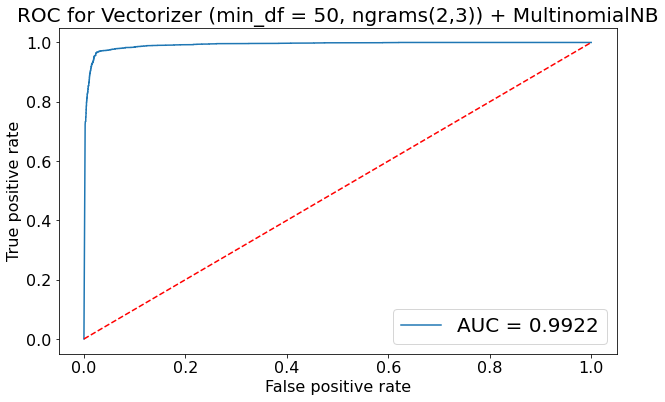

In [11]:
# Let's draw the ROC curve for CountVectorizer ngram2.3, min_df = 50, max_df =0.65, alpha =0.01
Vect_final = CountVectorizer(min_df = 50, max_df =0.65, ngram_range =(2,3), stop_words = ['reuters'])
x_words_Vect_final = Vect_final.fit_transform(data['text_nlp_lem'])
x_words_Vect_final = x_words_Vect_final.toarray()
    
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_words_Vect_final, y, random_state = 42, test_size =0.2)

classifNB_CV_23 = MultinomialNB(alpha = 0.01)
classifNB_CV_23.fit(x_train1, y_train1)

y_pred_cv = classifNB_CV_23.predict(x_test1)

print('Balanced accuracy is', balanced_accuracy_score(y_test1, y_pred_cv ,adjusted = True))

probs = classifNB_CV_23.predict_proba(x_test1)
probs = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test1, probs)
roc_auc_CV23 = auc(fpr, tpr)

plt.figure(figsize =(10,6))
plt.plot(fpr, tpr, label = 'AUC = %0.4f' % roc_auc_CV23)
plt.legend(loc = 'lower right',fontsize = 20)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC for Vectorizer (min_df = 50, ngrams(2,3)) + MultinomialNB',fontsize = 20)
plt.xlabel('False positive rate',fontsize = 16)
plt.ylabel('True positive rate',fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

In [12]:
# Summary highest performant model 3
CountVectorizer_ngram23 = [round(balanced_accuracy_score(y_test1, y_pred_cv ,adjusted = True), 4), round(roc_auc_CV23, 4)]
CountVectorizer_ngram23

[0.9336, 0.9922]

### 2 - MultinomialNB: TFIDFVectorizer on Lemmetized text

In [13]:
min_dfidf = [15, 25, 50, 100, 200, 300, 400, 500, 1000, 2000, 5000, 10000]
Balanced_ac_tfidfc = []
words_tfidf = []
AUC_model3 = []

for i in min_dfidf:
    TermFIDF = TfidfVectorizer(min_df = i, max_df=0.65, stop_words = ['reuters'])
    TermFIDF.fit(data['text_nlp_lem'])
    x_v_min_df = TermFIDF.transform(data['text_nlp_lem'])
    x_v_min_df = x_v_min_df.toarray()
    words_tfidf.append(x_v_min_df.shape[1])
    
    x_train, x_test, y_train, y_test = train_test_split(x_v_min_df , y, test_size = 0.2, random_state = 42)

    classif = MultinomialNB()
    classif.fit(x_train, y_train)
    y_pred = classif.predict(x_test)
    
    prob = classif.predict_proba(x_test)
    prob = prob[:,1]
    
    fpr, tpr, threshold = roc_curve(y_test, prob)
    AUC_model3.append(round(auc(fpr, tpr) , 4))
    
    Balanced_ac_tfidfc.append(float('{:.4f}'.format(balanced_accuracy_score(y_test, y_pred, adjusted =True))))

for i,j,z in zip(min_dfidf, Balanced_ac_tfidfc, AUC_model3):
    print('min_df =', i, ', Balanced accuracy =', j, ', AUC', z )

min_df = 15 , Balanced accuracy = 0.8599 , AUC 0.9801
min_df = 25 , Balanced accuracy = 0.8573 , AUC 0.98
min_df = 50 , Balanced accuracy = 0.8583 , AUC 0.9796
min_df = 100 , Balanced accuracy = 0.8585 , AUC 0.9791
min_df = 200 , Balanced accuracy = 0.8511 , AUC 0.9784
min_df = 300 , Balanced accuracy = 0.8465 , AUC 0.9779
min_df = 400 , Balanced accuracy = 0.8489 , AUC 0.978
min_df = 500 , Balanced accuracy = 0.8508 , AUC 0.9782
min_df = 1000 , Balanced accuracy = 0.8475 , AUC 0.977
min_df = 2000 , Balanced accuracy = 0.8373 , AUC 0.9764
min_df = 5000 , Balanced accuracy = 0.8228 , AUC 0.9727
min_df = 10000 , Balanced accuracy = 0.7151 , AUC 0.9303


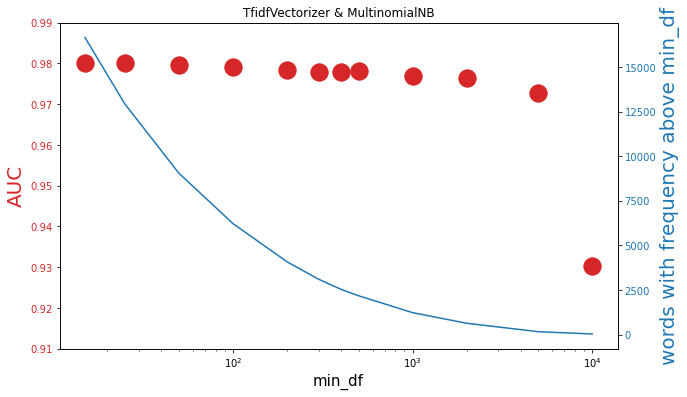

In [14]:
#plotting AUC vs min_df

fig, ax1 = plt.subplots(figsize =(10,6))
plt.title('TfidfVectorizer & MultinomialNB')
color = 'tab:red'
ax1.scatter(min_dfidf, AUC_model3, color = color, s=300)
ax1.set_ylabel('AUC', color = color, fontsize = 20)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlabel('min_df', fontsize =15)
ax1.yaxis.set_ticks(np.arange(0.91, 1, 0.01))
ax1.set_xscale('log')

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(min_dfidf, words_tfidf, color = color)
ax2.set_ylabel('words with frequency above min_df' ,  color = color, fontsize = 20)
ax2.tick_params(axis='y', labelcolor=color)
plt.savefig('C:\\Users\\gianl\\Capstone2\\figures\\accuracy_TFIDF_MultinomialNB.tiff')
plt.show();

**Conclusion: With min_df = 50, AUC is slightly lower than with min_df= 15, but it is way faster.**  

In [15]:
# Let's check different Ngrams with TfidfVectorizer (min_df = 50, max_df=0.65), 2 values of alpha (0.01, 0.1) for multinomial NB
ngram =[]
best_param = []
AUC_model3b = []
accuracy_TFIDF = []
param_grid = {'alpha':[0.01, 0.1]}

first_g = [1,1,1,2,2,3]
second_g = [1,2,3,2,3,3]

for i,j in zip(first_g, second_g):
    TermFIDF = TfidfVectorizer(min_df = 50, ngram_range =(i,j), stop_words = ['reuters'])
    x_words_IF_IDF = TermFIDF.fit_transform(data['text_nlp_lem'])
    
    x_train, x_test, y_train, y_test = train_test_split(x_words_IF_IDF, y, random_state = 42, test_size =0.2)

    classifNB2 = MultinomialNB()
    gm_sv = GridSearchCV(classifNB2, param_grid = param_grid, cv= 3)
    gm_sv.fit(x_train, y_train)

    y_pred_cv = gm_sv.predict(x_test)
    ngram.append(str(i)+','+str(j))
    best_param.append(gm_sv.best_params_)
    accuracy_TFIDF.append(balanced_accuracy_score(y_test, y_pred_cv ,adjusted = True))
    
    prob = gm_sv.predict_proba(x_test)
    prob = prob[:,1]
    fpr, tpr, threshold = roc_curve(y_test, prob)
    AUC_model3b.append(round(auc(fpr, tpr) , 4))
    
results_TFIDF = pd.DataFrame({'ngram':ngram, 'best_param': best_param,'Balanced accuracy': accuracy_TFIDF, 'AUC' : AUC_model3b })
results_TFIDF

,ngram,best_param,Balanced accuracy,AUC
0,"1,1",{'alpha': 0.01},0.860764,0.9813
1,"1,2",{'alpha': 0.01},0.907618,0.9904
2,"1,3",{'alpha': 0.01},0.921542,0.9921
3,"2,2",{'alpha': 0.01},0.917633,0.9924
4,"2,3",{'alpha': 0.01},0.926184,0.9934
5,"3,3",{'alpha': 0.01},0.754294,0.9742


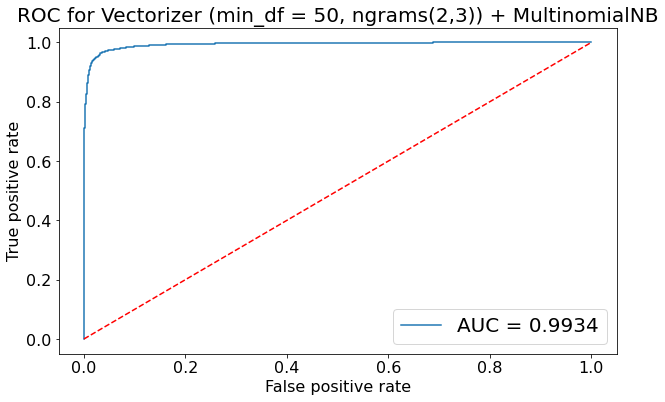

In [16]:
# Let's draw the ROC curve for TfidfVectorizer ngram2.3, min_df = 50, max_df =0.65, alpha =0.01
Vect_final_Tfidf = TfidfVectorizer(min_df = 50, max_df =0.65, ngram_range =(2,3), stop_words = ['reuters'])
x_words_Tfidf_final = Vect_final_Tfidf.fit_transform(data['text_nlp_lem'])
x_words_Tfidf_final = x_words_Tfidf_final.toarray()
    
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_words_Tfidf_final, y, random_state = 42, test_size =0.2)

    
classifNB_TFIDF_23 = MultinomialNB(alpha = 0.01)
classifNB_TFIDF_23.fit(x_train2, y_train2)

y_pred_tfidf = classifNB_TFIDF_23.predict(x_test2)

probs = classifNB_TFIDF_23.predict_proba(x_test2)
probs = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test2, probs)
roc_auc_TFIDF23 = auc(fpr, tpr)

plt.figure(figsize =(10,6))
plt.plot(fpr, tpr, label = 'AUC = %0.4f' % roc_auc_TFIDF23)
plt.legend(loc = 'lower right',fontsize = 20)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC for Vectorizer (min_df = 50, ngrams(2,3)) + MultinomialNB',fontsize = 20)
plt.xlabel('False positive rate',fontsize = 16)
plt.ylabel('True positive rate',fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

In [17]:
# Summary highest performant model 4
TfidfVectorizer_ngram23 = [round(balanced_accuracy_score(y_test2, y_pred_tfidf ,adjusted = True),4), round(roc_auc_TFIDF23, 4)]
TfidfVectorizer_ngram23

[0.9262, 0.9934]

### Comparison models 1 and 2 (AUC vs ngrams)

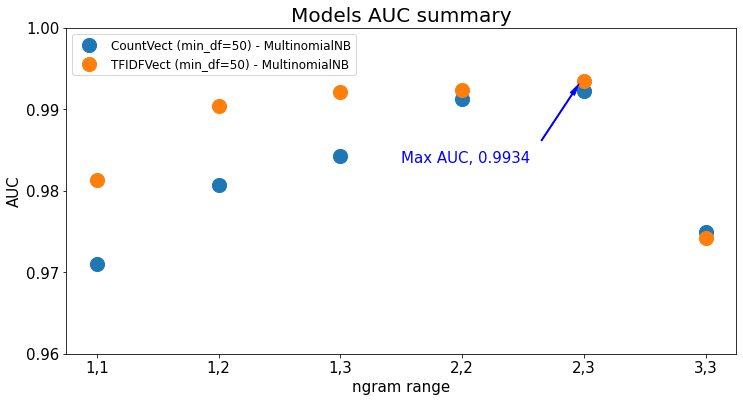

In [18]:
plt.figure(figsize=(12,6))
plt.scatter(results_CV['ngram'], results_CV['AUC'], label = 'CountVect (min_df=50) - MultinomialNB', s= 200)
plt.scatter(results_CV['ngram'], results_TFIDF['AUC'], label = 'TFIDFVect (min_df=50) - MultinomialNB', s= 200)
plt.ylabel('AUC', fontsize =15)
plt.xlabel('ngram range', fontsize =15)
plt.title('Models AUC summary', fontsize =20)
plt.yticks(np.arange(0.96, 1.00, 0.01), fontsize = 15)
plt.xticks( fontsize = 15)
plt.legend(loc='upper left', fontsize = 12)
plt.annotate('Max AUC, 0.9934 ', fontsize = 15, xy= (4.0, 0.994), xytext=(2.5, 0.985), 
             arrowprops = dict(color='blue', width=1, headwidth=5, shrink=0.1), va = 'top', color = 'blue')
plt.savefig('C:\\Users\\gianl\\Capstone2\\figures\\balance_accuracy_Vect_and_TFIDF_ngrams_MultinomialNB.tiff', dpi =120)
plt.show()

**BEST MODELS, between 2 and 3, are:**
- CountVectorizer ngram2.3, min_df = 50, max_df =0.65, alpha =0.01 / AUC = 0.9922
- TfidfVectorizer ngram2.3, min_df = 50, max_df =0.65, alpha =0.01  / AUC = 0.9934

### 3- Logistic Regression: Linguistic indexes ONLY, 

In [4]:
#split data
X_train_ling, X_test_ling, y_train_ling, y_test_ling = train_test_split(Ling_Indexes_scaled, y, test_size =0.2)

In [5]:
ling_regres = LogisticRegression()
params = {'C': [0.01, 0.1, 1, 10, 100]}

Model_1 = GridSearchCV(ling_regres, params, cv = 4)
Model_1.fit(X_train_ling, y_train_ling)

y_pred_1 = Model_1.predict(X_test_ling)

print('Balanced Accuracy is', balanced_accuracy_score(y_test_ling, y_pred_1, adjusted = True))
print('Best param is', Model_1.best_params_)

# AUC calcultation and print
probs = Model_1.predict_proba(X_test_ling)[:,1]
fpr, tpr, threshold = roc_curve(y_test_ling, probs)
roc_auc_LR_IN = auc(fpr, tpr)
print('AUC is ', roc_auc_LR_IN)

Balanced Accuracy is 0.7648996870163092
Best param is {'C': 0.1}
AUC is  0.9430780941566328


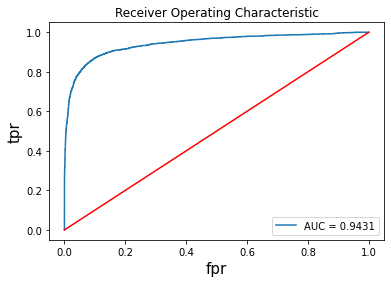

In [6]:
# plot ROC 
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label = 'AUC = %0.4f' % roc_auc_LR_IN)
plt.plot([0,1], [0,1], color = 'red')
plt.legend(loc = 'lower right')
plt.xlabel('fpr', fontsize = 15)
plt.ylabel('tpr', fontsize = 15)
plt.show()

In [7]:
# Summary Logistic regression on Indexes 
Log_Reg_index = ['{:.4f}'.format(balanced_accuracy_score(y_test_ling, y_pred_1, adjusted = True)), round(roc_auc_LR_IN, 4)]
Log_Reg_index

['0.7649', 0.9431]

### 4 - Logistic Regression: CountVectorizer on Lemmetized text & Linguistic indexes  

#### In model 4-7 I will have to concatenate the linguist indexes with Vectorized lem text

In [5]:
# CountVectorizer(min_df = 50, ngram_range =(2,3), max_df =0.65) + Scaled linguist indexes

vectorizer = CountVectorizer(min_df = 50, ngram_range = (2,3), max_df=0.65, stop_words = ['reuters'])
vectorizer.fit(data['text_nlp_lem'])
x_v_mins = vectorizer.transform(data['text_nlp_lem'])
x_v_mins = x_v_mins.toarray()

# merge data 
X_total_scaled = pd.concat([pd.DataFrame(Ling_Indexes_scaled), pd.DataFrame(x_v_mins)], axis = 1)

# split train/test sets
x_train_ts, x_test_ts, y_train_ts, y_test_ts = train_test_split(X_total_scaled, y, random_state = 42, test_size =0.2)


In [20]:
fina_Reg = LogisticRegression(max_iter=2000)
param = {'C':[1,10,20]}

Final_Grid_Log = GridSearchCV(fina_Reg, param, cv = 3)
Final_Grid_Log.fit(x_train_ts, y_train_ts)

print('Balanced accuracy is ', '{:.4}'.format(balanced_accuracy_score(y_test_ts, Final_Grid_Log.predict(x_test_ts), adjusted= True)))
print('best C is', Final_Grid_Log.best_params_)

probs2 = Final_Grid_Log.predict_proba(x_test_ts)
pred2 = probs2[:,1]
fpr, tpr, threshold = roc_curve(y_test_ts, pred2)
roc_auc_cv = auc(fpr, tpr)
print('AUC is ', round(roc_auc_cv,4))

Balanced accuracy is  0.9748
best C is {'C': 1}
AUC is  0.9987


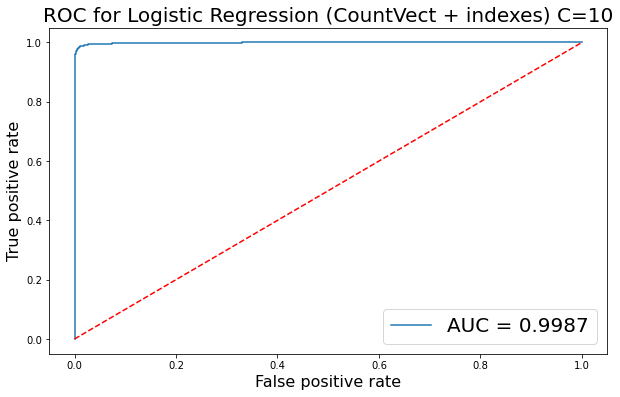

In [21]:
# Draw the ROC curve
plt.figure(figsize =(10,6))
plt.plot(fpr, tpr, label = 'AUC = %0.4f' % roc_auc_cv)
plt.legend(loc = 'lower right',fontsize = 20)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC for Logistic Regression (CountVect + indexes) C=10',fontsize = 20)
plt.xlabel('False positive rate',fontsize = 16)
plt.ylabel('True positive rate',fontsize = 16)
plt.show()

In [22]:
# Summary Logistic Regression on Lem text with countVectorizer 2,3 + indexes
Logistic_CV_23_plus_index = [round(balanced_accuracy_score(y_test_ts, Final_Grid_Log.predict(x_test_ts), adjusted= True),4), round(roc_auc_cv, 4)]
Logistic_CV_23_plus_index

[0.9748, 0.9987]

### 5 - Logistic Regression: TfidfVectorizer on Lemmetized text & Linguistic indexes

In [7]:
# TfidfVectorizer(min_df = 50, ngram_range =(2,3), max_df =0.65) + Scaled linguist indexes

TermFIDF_50 = TfidfVectorizer(min_df = 50, ngram_range =(2,3), max_df =0.65, stop_words = ['reuters'])
x_words_IF_IDF = TermFIDF_50.fit_transform(data['text_nlp_lem'])
x_words_IF_IDF = x_words_IF_IDF.toarray()

# merge data 
X_total_scaled_ifidf = pd.concat([pd.DataFrame(Ling_Indexes_scaled), pd.DataFrame(x_words_IF_IDF)], axis = 1)

# split train/test sets
x_train_tfidf, x_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_total_scaled_ifidf, y, random_state = 42, test_size =0.2)

In [8]:
fina_Reg2 = LogisticRegression(max_iter=2000)
param = {'C':[200, 260]}


Final_Grid_Logidf = GridSearchCV(fina_Reg2, param, cv = 3)
Final_Grid_Logidf.fit(x_train_tfidf, y_train_tfidf)

print('Balanced accuracy is ', '{:.4}'.format(balanced_accuracy_score(y_test_tfidf, Final_Grid_Logidf.predict(x_test_tfidf), adjusted = True)))
print('best C is', Final_Grid_Logidf.best_params_ )

probs3 = Final_Grid_Logidf.predict_proba(x_test_tfidf)
pred3 = probs3[:,1]
fpr, tpr, threshold = roc_curve(y_test_tfidf, pred3)
roc_auc_tfidf = auc(fpr, tpr)
print('AUC', round(roc_auc_tfidf, 6 ))

Balanced accuracy is  0.9755
best C is {'C': 200}
AUC 0.999237


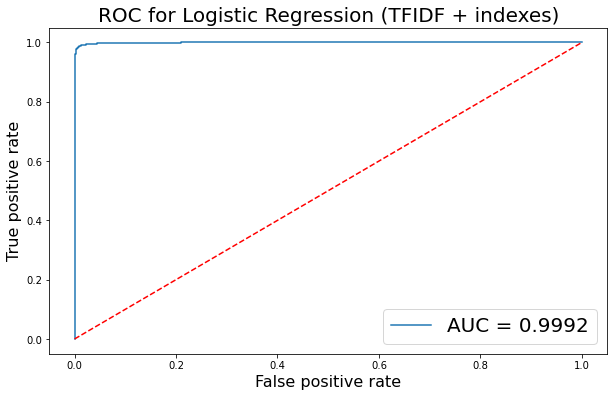

In [25]:
# Draw the ROC curve
plt.figure(figsize =(10,6))
plt.plot(fpr, tpr, label = 'AUC = %0.4f' % roc_auc_tfidf)
plt.legend(loc = 'lower right',fontsize = 20)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC for Logistic Regression (TFIDF + indexes)',fontsize = 20)
plt.xlabel('False positive rate',fontsize = 16)
plt.ylabel('True positive rate',fontsize = 16)
plt.show()

In [26]:
# Summary highest performant model 5
Logistic_TFIDF_23_plus_index = ['{:.4}'.format(balanced_accuracy_score(y_test_tfidf, Final_Grid_Logidf.predict(x_test_tfidf), adjusted = True)), round(roc_auc_tfidf, 4)]
Logistic_TFIDF_23_plus_index

['0.9755', 0.9992]

***MODELS 4-5 PERFORMANCE SUMMARY***

In [27]:
print('MODEL 4: Balanced Accuracy', Logistic_CV_23_plus_index[0], ', AUC', Logistic_CV_23_plus_index[1])
print('MODEL 5: Balanced Accuracy', Logistic_TFIDF_23_plus_index[0], ', AUC', Logistic_TFIDF_23_plus_index[1])

MODEL 4: Balanced Accuracy 0.9748 , AUC 0.9987
MODEL 5: Balanced Accuracy 0.9755 , AUC 0.9992


### 6 - Random Forest: CountVectorizer on Lemmetized text & Linguistic indexes 

In [28]:
classifRF_CV = RandomForestClassifier()
params = {'n_estimators': [50,100],
    'max_depth' : [None, 2 ],
    'min_samples_leaf':  [1, 3]}


RandoF_CV = GridSearchCV(classifRF_CV, params, cv = 3)
RandoF_CV.fit(x_train_ts, y_train_ts)

y_pred_RF = RandoF_CV.predict(x_test_ts)
acc_CV_RF = balanced_accuracy_score(y_test_ts, y_pred_RF, adjusted = True)

print('Best params are', RandoF_CV.best_params_)
print('Balanced accuracy is', round(acc_CV_RF, 4))

probs4 = RandoF_CV.predict_proba(x_test_ts)
probs4 = probs4[:,1]
fpr, tpr, threshold = roc_curve(y_test_ts, probs4)
roc_auc_RF1 = auc(fpr, tpr)
print('AUC is', round(roc_auc_RF1, 4))

Best params are {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}
Balanced accuracy is 0.9632
AUC is 0.9978


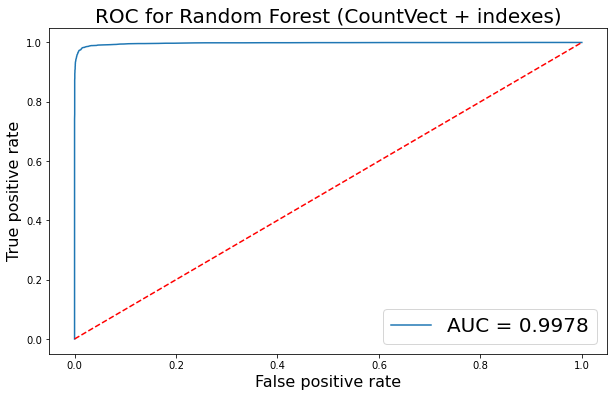

In [29]:
# Draws the ROC curve 
plt.figure(figsize =(10,6))
plt.plot(fpr, tpr, label = 'AUC = %0.4f' % roc_auc_RF1)
plt.legend(loc = 'lower right',fontsize = 20)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC for Random Forest (CountVect + indexes)',fontsize = 20)
plt.xlabel('False positive rate',fontsize = 16)
plt.ylabel('True positive rate',fontsize = 16)
plt.show()

In [30]:
# Summary highest performant model 6
RandomF_CV_23_plus_index = [round(acc_CV_RF, 4), round(roc_auc_RF1, 4)]
RandomF_CV_23_plus_index

[0.9632, 0.9978]

### 7 - Random Forest: TfidfVectorizer on Lemmetized text & Linguistic indexes 

In [31]:
classifRF_TFIDF = RandomForestClassifier()
params = {'n_estimators': [50,100],
    'max_depth' : [None, 2 ],
    'min_samples_leaf':  [1, 3]}


RandoF_TFIDF = GridSearchCV(classifRF_TFIDF, params, cv = 3)
RandoF_TFIDF.fit(x_train_tfidf, y_train_tfidf)

y_pred_RF2 = RandoF_TFIDF.predict(x_test_tfidf)
acc_TFIDF_RF = balanced_accuracy_score(y_test_tfidf, y_pred_RF2, adjusted = True)

print('Best params are', RandoF_TFIDF.best_params_)
print('Balanced accuracy is', round(acc_TFIDF_RF, 4))

# Calculate AUC
probs5 = RandoF_TFIDF.predict_proba(x_test_tfidf)
probs5 = probs5[:,1]
fpr, tpr, threshold = roc_curve(y_test_tfidf, probs5)
roc_auc_RF2 = auc(fpr, tpr)
print('AUC is', round(roc_auc_RF2,4))

Best params are {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}
Balanced accuracy is 0.9637
AUC is 0.9981


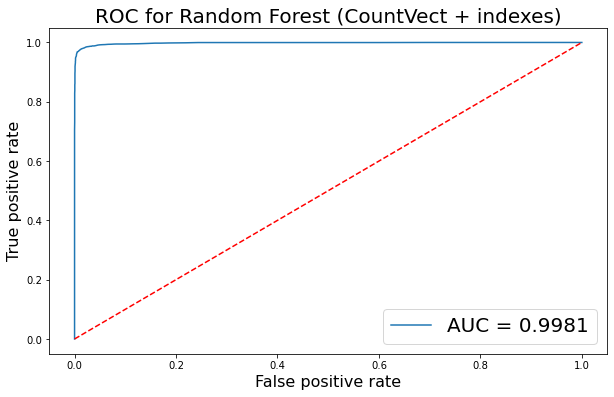

In [32]:
# Draws the ROC curve 
plt.figure(figsize =(10,6))
plt.plot(fpr, tpr, label = 'AUC = %0.4f' % roc_auc_RF2)
plt.legend(loc = 'lower right',fontsize = 20)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC for Random Forest (CountVect + indexes)',fontsize = 20)
plt.xlabel('False positive rate',fontsize = 16)
plt.ylabel('True positive rate',fontsize = 16)
plt.show()

In [33]:
# Summary highest performant model 7
RandomF_TFIDF_23_plus_index = [round(acc_TFIDF_RF, 4), round(roc_auc_RF2, 4)]
RandomF_TFIDF_23_plus_index

[0.9637, 0.9981]

***MODELS 6-7 PERFORMANCE SUMMARY***

In [34]:
print('MODEL 6: Balanced Accuracy', RandomF_CV_23_plus_index[0], ', AUC', RandomF_CV_23_plus_index[1])
print('MODEL 7: Balanced Accuracy', RandomF_TFIDF_23_plus_index[0], ', AUC', RandomF_TFIDF_23_plus_index[1])

MODEL 6: Balanced Accuracy 0.9632 , AUC 0.9978
MODEL 7: Balanced Accuracy 0.9637 , AUC 0.9981


## All results together

In [35]:
# MODEL comparison
models = pd.DataFrame(np.array([Log_Reg_index, CountVectorizer_ngram23, TfidfVectorizer_ngram23, Logistic_CV_23_plus_index,Logistic_TFIDF_23_plus_index, RandomF_CV_23_plus_index, RandomF_TFIDF_23_plus_index]), columns=['Balanced Accuracy', 'AUC'], 
                      index = [ 'CountVect ngram23 on Lem Text', 'TfidftVect ngram23 on Lem Text', 'Log Reg on indexes','Log Reg CountVect ngram23 plus index', 'Log Reg TFIDFVect ngram23 plus index', 'RandomF CountVect ngram23 plus index', 'RandomF TFIDFVect ngram23 plus index'])
models

,Balanced Accuracy,AUC
Log Reg on indexes,0.7649,0.9431
CountVect ngram23 on Lem Text,0.9336,0.9922
TfidftVect ngram23 on Lem Text,0.9262,0.9934
Log Reg CountVect ngram23 plus index,0.9748,0.9987
Log Reg TFIDFVect ngram23 plus index,0.9755,0.9992
RandomF CountVect ngram23 plus index,0.9632,0.9978
RandomF TFIDFVect ngram23 plus index,0.9637,0.9981


## Final verdict: Logistic Regressor (C=200), TFIDFVectorizer  (ngram = 2,3, min_df=50, max_df=0.65) plus scaled indexes is the best model : AUC = 0.9992
### Let's do few more things with this model

#### 1- Let's dive into the missclassified entries

In [6]:
TermFIDF_50 = TfidfVectorizer(min_df = 50, ngram_range =(2,3), max_df =0.65, stop_words = ['reuters'])
x_words_IF_IDF = TermFIDF_50.fit_transform(data['text_nlp_lem'])
x_words_IF_IDF = x_words_IF_IDF.toarray()

# merge data 
X_total_scaled_ifidf = pd.concat([pd.DataFrame(Ling_Indexes_scaled), pd.DataFrame(x_words_IF_IDF)], axis = 1)

# split train/test sets
x_train_tfidf, x_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_total_scaled_ifidf, y, random_state = 42, test_size =0.2)

fina_Reg2 = LogisticRegression(max_iter=2000, C=200)
fina_Reg2.fit(x_train_tfidf, y_train_tfidf)

prediction = fina_Reg2.predict(x_test_tfidf)

print('Balanced accuracy is ', '{:.4}'.format(balanced_accuracy_score(y_test_tfidf, prediction, adjusted = True)))

probs3 = fina_Reg2.predict_proba(x_test_tfidf)
pred3 = probs3[:,1]
fpr, tpr, threshold = roc_curve(y_test_tfidf, pred3)
roc_auc_tfidf = auc(fpr, tpr)

print('AUC', round(roc_auc_tfidf, 6 ))
print(confusion_matrix(y_test_tfidf, prediction))

Balanced accuracy is  0.9755
AUC 0.999237
[[4186   25]
 [  65 3440]]


In [7]:
# let's gather the index of all the missclassified observations
classified = pd.DataFrame(y_test_tfidf)
classified['prediction'] = prediction
missclassified = classified[classified['Real_Fake'] != classified['prediction']]
missclassified

,Real_Fake,prediction
3704,1,0
1465,1,0
3288,1,0
198,1,0
1346,1,0
...,...,...
1231,1,0
22832,1,0
24225,1,0
9430,1,0


In [8]:
# the text below belongs to a Fake News, but it was classified as Real
# reading it, it appears legit.
data.iloc[1231, 2]

' and why obama may be better off with a republican president edward klein paints a very compelling picture of what is going through narcissist barack obama s head:(if we could get a sneak peek at barack obama s secret diary, this is what we might read. )i will have to endorse hillary if she gets the nomination which looks almost certain now but i will not have my heart in it. when i leave office in little over a year, i will be the youngest ex-president since teddy roosevelt. i will still have that same big-shouldered chicago lust for power that drove me from greenwood avenue in hyde park to pennsylvania avenue in three short years. but if hillary replaces me in the oval, she and bill will take control of the democratic party it will become the clinton party once again and  they will block me from having any future influence. i will end up like jimmy carter hammering away in appalachia for habitat for humanity. on the other hand, if a republican wins in 16, the clintons will be finish

In [9]:
# these are the indexes of JUST the false positive
missclassified[missclassified['prediction']==1].index

Int64Index([26195, 14555,  3337, 17318, 24192, 29071, 24117, 12728, 11243,
            37177, 32188, 32422,  8341, 26250, 37432,  5662, 28515, 28163,
            13705,  2726,  3470, 29944, 32314, 29720,  6053],
           dtype='int64')

In [17]:
# the text below belongs to a real news, classified as Fake. 
data.iloc[6053, 2]

" washington (reuters) - actor and director george clooney, a supporter of hillary clinton's presidential bid, broke ranks over campaign financing on saturday to condemn the 'obscene' sums of money in  usa  politics and praised clinton's chief political rival in the process. clooney made the remarks in an interview with nbc news' 'meet the press' the day after he and his wife, amal, hosted a fundraiser on democratic party hopeful clinton's behalf friday night with a price tag of up to $353,400 per couple. 'we had some protesters last night when we pulled up in san francisco and they are right to protest. they are absolutely right. it is an obscene amount of money,' clooney said in excerpts released on saturday. the interview will air on sunday. bernie sanders, a  usa  senator from vermont and clinton's rival in the race for the democratic nomination to run for the white house in the nov. 8 election, has pounced on former secretary of state clinton over the big-ticket event and for acce

In [24]:
# these are the mean of kincaid scores of the news classified as fake when actually were real
false_positive_kincaid_score = data.iloc[missclassified[missclassified['Real_Fake']==0].index, 25]
print('The kincaid score mean of all the false positives is', false_positive_kincaid_score.mean())

The kincaid score mean of all the false positives is 11.38850484917379


In [11]:
# Flesh Kincaid Mean of False Positives 
data.iloc[missclassified[missclassified['prediction']==1].index, 25].mean()

11.38850484917379

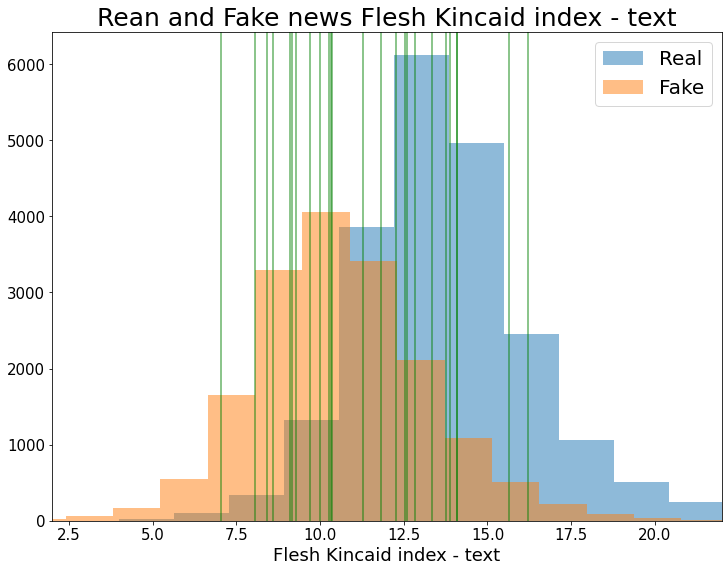

In [42]:
# plot the Flesh_Kin_Grade_text for the real news classified as fake 
plt.figure(figsize = (12,9))
plt.hist(data[data['Real_Fake']==0]['Flesh_Kin_Grade_text'], bins =50, alpha = 0.5, label = 'Real')
plt.hist(data[data['Real_Fake']==1]['Flesh_Kin_Grade_text'],  bins =50, alpha = 0.5, label = 'Fake')
plt.legend(fontsize = 20)
for i in false_positive_kincaid_score.values:
    plt.axvline(x= i ,alpha = 0.6, color = 'green')
plt.xlabel('Flesh Kincaid index - text', fontsize = 18 )
plt.title('Rean and Fake news Flesh Kincaid index - text', fontsize =25 )
plt.xlim(2,22)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.savefig('C:\\Users\\gianl\\Capstone2\\figures\\miss_classified_real news.tiff', dpi =120)
plt.show();

In [43]:
# Conclusion: hard to make a definitive statement. 
# It seems that real news classified as fake have lower Flesh_Kin_Grade_text score than most of the real news 
# This may have contribuited to the missclassification

#### 2- Identify the best probability threshold 

No handles with labels found to put in legend.


The ideal threshold is 0.3500 which will generate an balanced accuracy of 0.9779


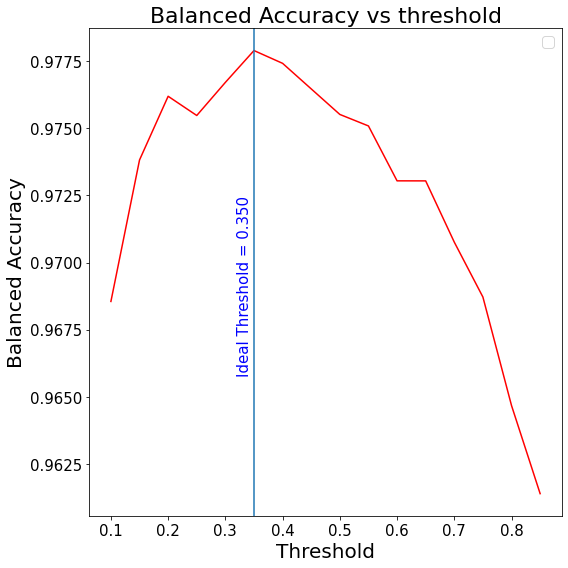

In [26]:
# plot accuracy and balance accuracy vs Threshold
thres = []
balance_accuracy = []
accuracy = []
prediction_proba = fina_Reg2.predict_proba(x_test_tfidf)
for i in np.arange(0.1, 0.9, 0.05):
    prediction = np.where(prediction_proba > i, 1, 0)
    accuracy.append(accuracy_score(y_test_tfidf, prediction[:,1]))
    balance_accuracy.append(balanced_accuracy_score(y_test_tfidf, prediction[:,1], adjusted = True))
    thres.append(i)
  
# retrieving ideal threshold
ideal_t = thres[balance_accuracy.index(max(balance_accuracy))]
print('The ideal threshold is', '{:.4f}'.format(ideal_t), 'which will generate an balanced accuracy of', '{:.4f}'.format(max(balance_accuracy)))
plt.figure(figsize = (8,8))
plt.plot(thres, balance_accuracy, color = 'red')
plt.title('Balanced Accuracy vs threshold', fontsize = 22)
plt.legend(loc = 'upper right', fontsize = 15)
plt.xlabel('Threshold', fontsize = 20)
plt.ylabel('Balanced Accuracy', fontsize = 20)
plt.xticks(fontsize = 15), plt.yticks(fontsize = 15)
plt.annotate('Ideal Threshold = %.3f' % ideal_t, fontsize = 15, xy= (0.32, 0.9725),  va = 'top', color = 'blue', rotation = 90)
plt.axvline(x = ideal_t )
plt.tight_layout()
plt.savefig('C:\\Users\\gianl\\Capstone2\\figures\\ideal_threshold.tiff', dpi =120)
plt.show();

#### 3- Investigate the role of the link tokens on the prediction

In [6]:
# MODELING WITH and withouth LINK TOKENS to see how they affect the performance of the model

no_token_links = ['facbooolink','bitlyylinkk','youtubelink','twitterlink', 'tmsnrtlinnk', 'reuters']
reuters = ['reuters']
stopw = [no_token_links, reuters]

balanced_accuracy=[]
auc_Model = []
Links_token = []


for i in stopw:
    vectorizer = TfidfVectorizer(min_df = 50, ngram_range = (2,3), max_df=0.65, stop_words = i)
    vectorizer.fit(data['text_nlp_lem'])
    x_v_mins = vectorizer.transform(data['text_nlp_lem'])
    x_v_mins = x_v_mins.toarray()

    # merge data 
    X_total_scaled = pd.concat([pd.DataFrame(Ling_Indexes_scaled), pd.DataFrame(x_v_mins)], axis = 1)

    # split train/test sets
    x_train_ts, x_test_ts, y_train_ts, y_test_ts = train_test_split(X_total_scaled, y, random_state = 42, test_size =0.2)
    
    
    fina_Reg = LogisticRegression(max_iter=2000)
    param = {'C':[10]}

    Final_Grid_Log = GridSearchCV(fina_Reg, param, cv = 3)
    Final_Grid_Log.fit(x_train_ts, y_train_ts)
    
    y_pred = Final_Grid_Log.predict(x_test_ts)
    balanced_accuracy.append(round(balanced_accuracy_score(y_test_ts, y_pred, adjusted = True), 4))
    Links_token.append(i)
    probs = Final_Grid_Log.predict_proba(x_test_ts)[:,1]
    
    fpr, tpr , threshold = roc_curve(y_test_ts, probs)
    auc_Model.append(round(auc(fpr, tpr),6))
    
Tables_Perf = pd.DataFrame({'Tokens Excluded' : ['No', 'Yes'], 'Balanced accuracy': balanced_accuracy, 'AUC' : auc_Model})
Tables_Perf.sort_values('Balanced accuracy', ascending = False)

,Tokens Excluded,Balanced accuracy,AUC
1,Yes,0.9741,0.999211
0,No,0.9738,0.999205
